<a href="https://colab.research.google.com/github/Akhmadkhan/Research4/blob/main/%D0%A0%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B0_%D0%BD%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B9%D0%BA%D0%B8_%D0%BF%D0%B0%D1%80%D0%B0%D0%BC%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D1%80%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B8_%D1%81_%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D1%8F%D0%B5%D0%BC%D1%8B%D0%BC%D0%B8_%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Примеры

In [ ]:
import numpy as np
# Функция активации (например, сигмоида)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Производная функции активации
def sigmoid_derivative(x):
    return x * (1 - x)

# Входные данные
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Выходные данные
y = np.array([[0], [1], [1], [0]])

# Инициализация весов сети
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

# Случайная инициализация весов
hidden_weights = np.random.uniform(size=(input_neurons, hidden_neurons))
output_weights = np.random.uniform(size=(hidden_neurons, output_neurons))

# Обучение сети
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    # Прямое распространение
    hidden_layer_input = np.dot(X, hidden_weights)
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_weights)
    output_layer_output = sigmoid(output_layer_input)

    # Ошибка
    error = y - output_layer_output

    # Обратное распространение ошибки
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(output_weights.T)
    hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Обновление весов
    output_weights += hidden_layer_output.T.dot(d_output) * learning_rate
    hidden_weights += X.T.dot(hidden_layer) * learning_rate

print("Выходные данные после обучения:")
print(output_layer_output)

Выходные данные после обучения:
[[0.11773005]
 [0.92104719]
 [0.92102186]
 [0.04959919]]


In [ ]:
import numpy as np

class MomentumGradientDescent:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = None

    def update_weights(self, weights, gradients):
        if self.velocity is None:
            self.velocity = np.zeros_like(weights)

        self.velocity = self.momentum * self.velocity - self.learning_rate * gradients
        weights += self.velocity

weights = np.array([1.0, 2.0, 3.0])
gradients = np.array([0.1, 0.2, 0.3])

# Создание экземпляра класса с параметрами скорости обучения и импульса
optimizer = MomentumGradientDescent(learning_rate=0.01, momentum=0.9)

# Обновление весов с использованием градиентов
optimizer.update_weights(weights, gradients)

In [ ]:
import numpy as np

class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update_weights(self, weights, gradients):
        if self.m is None:
            self.m = np.zeros_like(weights)
            self.v = np.zeros_like(weights)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * gradients
        self.v = self.beta2 * self.v + (1 - self.beta2) * (gradients ** 2)

        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        weights -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# Создание экземпляра класса с параметрами скорости обучения и параметрами beta
optimizer = AdamOptimizer(learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8)

# Обновление весов с использованием градиентов
optimizer.update_weights(weights, gradients)

# РАЗРАБОТКА АЛГОРИТМА НАСТРОЙКИ ПАРАМЕТРОВ РЕКУРРЕНТНЫХ НЕЙРОННЫХ СЕТЕЙ С УПРАВЛЯЕМЫМИ ЭЛЕМЕНТАМИ

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, regularizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import datetime

In [3]:
# Задайте интересующий вас тикер (например, "AAPL" для акций Apple)
ticker = "GOOGL"

# Задайте временной интервал (например, с "2020-01-01" по "2021-01-01")
start_date = "2014-01-01"
end_date = "2024-04-01"

# Получите данные с помощью Yahoo Finance API
df = yf.download(ticker, start=start_date, end=end_date)
df.describe()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,2577.000000,2577.000000,2577.000000,2577.000000,2577.000000,2.577000e+03
mean,70.875260,71.620688,70.145593,70.902445,70.902445,3.760979e+07
std,37.886449,38.337086,37.470366,37.909693,37.909693,1.984046e+07
min,24.962000,25.014000,24.545500,24.853001,24.853001,9.312000e+06
25%,38.917500,39.145000,38.513500,38.849998,38.849998,2.600400e+07
50%,57.767502,58.674999,57.331001,58.042000,58.042000,3.215400e+07
75%,102.900002,104.360001,101.754997,103.005997,103.005997,4.229400e+07
max,152.800003,153.779999,151.429993,153.509995,153.509995,2.571620e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2577 entries, 2014-01-02 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2577 non-null   float64
 1   High       2577 non-null   float64
 2   Low        2577 non-null   float64
 3   Close      2577 non-null   float64
 4   Adj Close  2577 non-null   float64
 5   Volume     2577 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 140.9 KB


In [5]:
# Получаем данные об акциях и просматриваем первые 5 записей детасета
data = yf.download(ticker, start=start_date, end=end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.914413,27.971722,27.734234,27.855856,27.855856,72783144
2014-01-03,27.902903,27.951200,27.650902,27.652653,27.652653,66601332
2014-01-06,27.853104,27.999498,27.688688,27.960960,27.960960,70701228
2014-01-07,28.153152,28.520771,28.057056,28.500000,28.500000,102001896
2014-01-08,28.678679,28.711712,28.360611,28.559309,28.559309,89610300


In [ ]:
column = ['Open', 'Adj Close', 'Volume']
df_new = df[column]
df_new

,Open,Adj Close,Volume
Date,,,
2014-01-02,27.914413,27.855856,72783144
2014-01-03,27.902903,27.652653,66601332
2014-01-06,27.853104,27.960960,70701228
2014-01-07,28.153152,28.500000,102001896
2014-01-08,28.678679,28.559309,89610300
...,...,...,...
2024-03-22,149.119995,150.770004,29175700
2024-03-25,149.940002,150.070007,19229300
2024-03-26,150.220001,150.669998,22149100


<Axes: title={'center': 'GOOGL stock'}, xlabel='Date'>

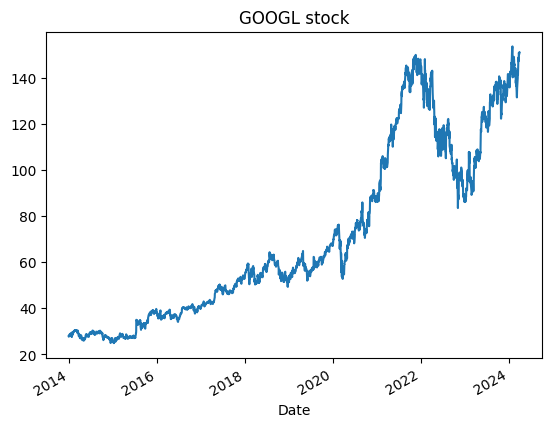

In [6]:
startDate = datetime.datetime(2014, 1, 1)
endDate = datetime.datetime(2024, 4, 1)
google_data = yf.Ticker('GOOGL')
google_df = google_data.history(start=startDate, end=endDate)
google_df['Close'].plot(title="GOOGL stock")

In [45]:
print("__________________________________________________________________")
print("значения для коэффициентов регуляризации (0,00001; 0,1).\n")
l1_reg = float(input("ВВедите коэффициент регуляризации L1: "))
l2_reg = float(input("ВВедите коэффициент регуляризации L2: "))
print("__________________________________________________________________")
print("значения для коэффициента импульса лежат в диапазоне (0,9; 0,99).\n")
momentum = float(input("ВВедите коэффициент импульса: "))
print("__________________________________________________________________")
epox = int(input("ВВедите число эпох: "))

__________________________________________________________________
значения для коэффициентов регуляризации (0,00001; 0,1).

ВВедите коэффициент регуляризации L1: 0.0001
ВВедите коэффициент регуляризации L2: 0.0001
__________________________________________________________________
значения для коэффициента импульса лежат в диапазоне (0,9; 0,99).

ВВедите коэффициент импульса: 0.99
__________________________________________________________________
ВВедите число эпох: 50


In [46]:
# Выбор нужных столбцов
column = ['Open', 'Adj Close', 'Volume']
df_new = df[column]

# Преобразование данных
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_new)

# Параметры модели
sequence_length = 15
n_features = 2
n_attention_heads = 3

# Подготовка данных
def prepare_data(data):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])
        y.append(data[i+sequence_length, -2])  # Изменение индекса для предсказания столбца 'Adj Close'
    return np.array(X), np.array(y)

X, y = prepare_data(df_scaled)

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Рекуррентная модель с механизмом внимания и GRU
inputs = layers.Input(shape=(sequence_length, n_features))
attention = layers.MultiHeadAttention(num_heads=n_attention_heads, key_dim=64)(inputs, inputs)
gru_out = layers.GRU(64, return_sequences=True, kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(attention)
out = layers.Flatten()(gru_out)
out = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(out)
out = layers.Dense(1, kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(out)
model = Model(inputs, out)

# Компиляция модели с оптимизатором SGD с моментом
optimizer = tf.keras.optimizers.SGD(momentum=momentum)
model.compile(optimizer=optimizer, loss='mse')

# Обучение модели на тренировочных данных с использованием обратного вызова History
history = model.fit(X_train, y_train, epochs=epox, batch_size=32, validation_split=0.2)

# Получение истории обучения
history_dict = history.history

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
loss = model.evaluate(X_test, y_test) #Средняя квадратическая ошибка
r_squared = r2_score(y_test, y_pred) #Коэффициент детерминации
mae = mean_absolute_error(y_test, y_pred) #Среднее абсолютное значение разности между предсказанными значениями модели и их соответствующими истинными значениями
mape = mean_absolute_percentage_error(y_test, y_pred) #Средняя абсолютная процентная ошибка между предсказанными и истинными значениями
spearman_corr, _ = spearmanr(y_test, y_pred) # Коэффициент Спирмена

print("Spearman's correlation coefficient:", spearman_corr)
print("R-squared:", r_squared)
print("MAE:", mae)
print("MAPE:", mape)
print("Test Loss:", loss)



Epoch 1/50
52/52 [==============================] - 4s 29ms/step - loss: 0.3046 - val_loss: 0.2916
Epoch 2/50
52/52 [==============================] - 1s 19ms/step - loss: 0.2513 - val_loss: 0.2264
Epoch 3/50
52/52 [==============================] - 1s 18ms/step - loss: 0.2193 - val_loss: 0.2038
Epoch 4/50
52/52 [==============================] - 1s 18ms/step - loss: 0.1931 - val_loss: 0.1800
Epoch 5/50
52/52 [==============================] - 1s 18ms/step - loss: 0.1660 - val_loss: 0.1524
Epoch 6/50
52/52 [==============================] - 1s 17ms/step - loss: 0.1401 - val_loss: 0.1272
Epoch 7/50
52/52 [==============================] - 1s 17ms/step - loss: 0.1160 - val_loss: 0.1042
Epoch 8/50
52/52 [==============================] - 1s 28ms/step - loss: 0.0941 - val_loss: 0.0832
Epoch 9/50
52/52 [==============================] - 2s 30ms/step - loss: 0.0742 - val_loss: 0.0649
Epoch 10/50
52/52 [==============================] - 1s 23ms/step - loss: 0.0573 - val_loss: 0.0496
Epoch 11/

In [47]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 15, 2)]              0         []                            
                                                                                                  
 multi_head_attention_6 (Mu  (None, 15, 2)                2114      ['input_7[0][0]',             
 ltiHeadAttention)                                                   'input_7[0][0]']             
                                                                                                  
 gru_6 (GRU)                 (None, 15, 64)               13056     ['multi_head_attention_6[0][0]
                                                                    ']                            
                                                                                            

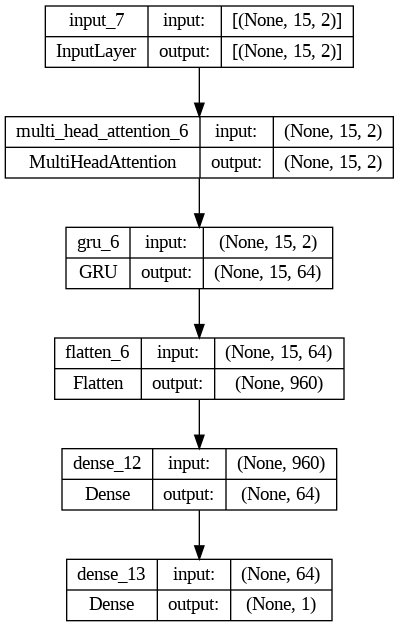

In [48]:
from tensorflow.keras.utils import plot_model

# Отображение архитектуры модели
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Показ изображения с архитектурой модели
from IPython.display import Image
Image("model_architecture.png")

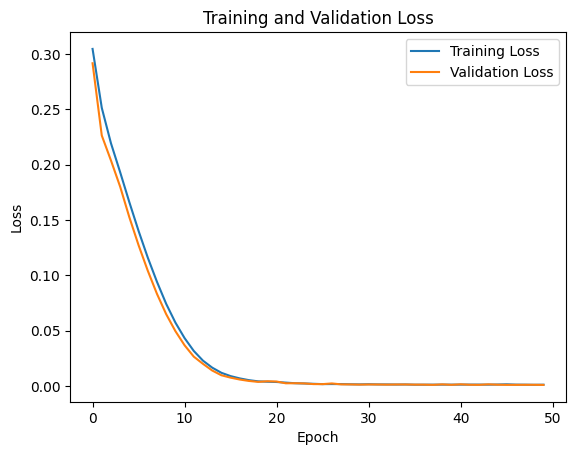

In [49]:
# Проверка наличия ключей 'loss' и 'val_loss'
if 'loss' in history_dict and 'val_loss' in history_dict:
    # Графики потерь на обучающем и валидационном наборах
    plt.plot(history_dict['loss'], label='Training Loss')
    plt.plot(history_dict['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("Ошибка: Не удалось найти историю потерь в обучении модели.")

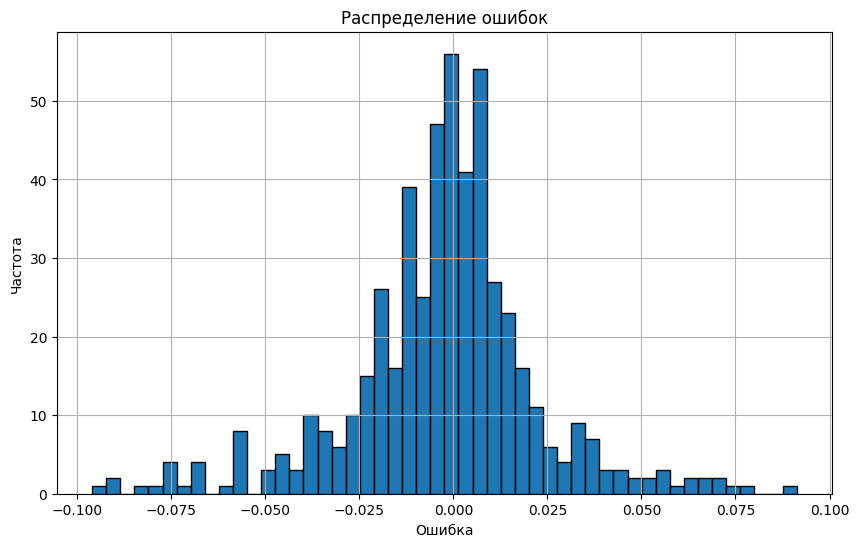

In [50]:
# Вычисление ошибок
errors = y_pred.flatten() - y_test

# Построение гистограммы распределения ошибок
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k')
plt.title('Распределение ошибок')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

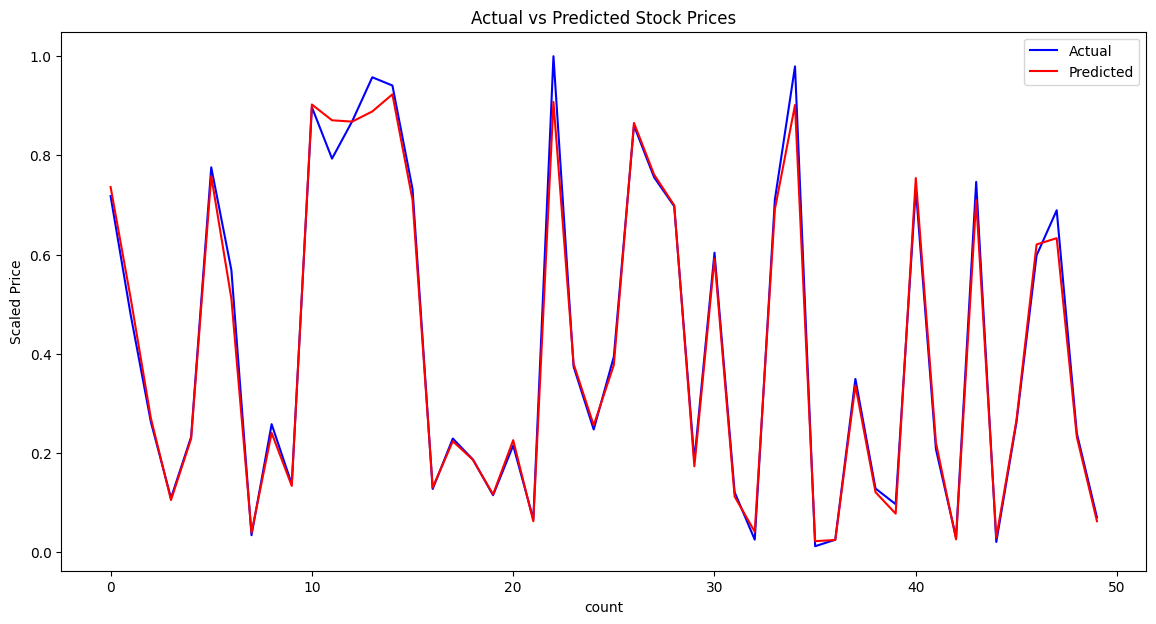

In [51]:
# Plotting actual vs predicted stock prices
plt.figure(figsize=(14, 7))

# Plotting actual values
plt.plot(y_test[0:50], label='Actual', color='blue')

# Plotting predicted values
plt.plot(y_pred[0:50], label='Predicted', color='red')

plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('count')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

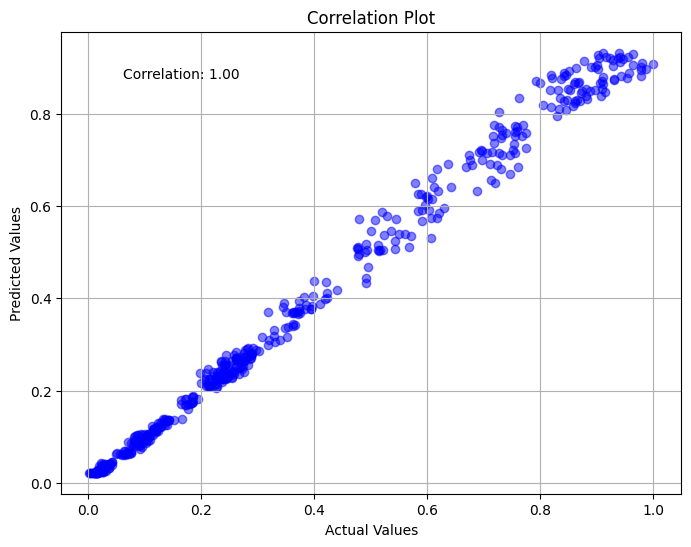

In [52]:
# Рассчитываем корреляцию между фактическими и предсказанными значениями
correlation = np.corrcoef(y_test.flatten(), y_pred.flatten())[0, 1]

# Создаем график корреляции
plt.figure(figsize=(8, 6))
plt.scatter(y_test.flatten(), y_pred.flatten(), color='blue', alpha=0.5)
plt.title('Correlation Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()

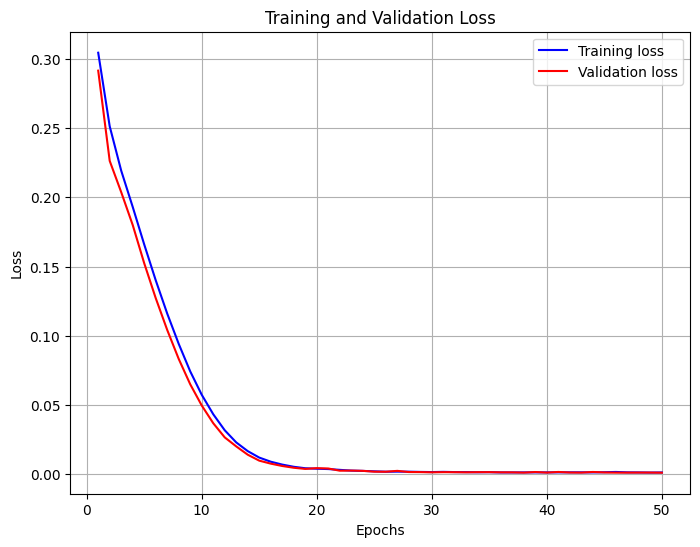

In [53]:
# Получаем историю потерь
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_loss) + 1)

# Создаем график
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

In [ ]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            12Gi       1.0Gi       7.8Gi       1.0Mi       3.8Gi        11Gi
Swap:             0B          0B          0B


In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

# Модель Hyperband

In [1]:
! pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [19]:
from keras_tuner.tuners import Hyperband

# Функция создания модели для Hyperband
def build_model(hp):
    n_attention_heads = hp.Int('n_attention_heads', min_value=2, max_value=5, step=1)
    gru_units = hp.Int('gru_units', min_value=32, max_value=128, step=32)
    l1_reg = hp.Float('l1_reg', min_value=1e-4, max_value=1e-2, sampling='log')
    l2_reg = hp.Float('l2_reg', min_value=1e-4, max_value=1e-2, sampling='log')
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    inputs = layers.Input(shape=(sequence_length, n_features))
    attention = layers.MultiHeadAttention(num_heads=n_attention_heads, key_dim=64)(inputs, inputs)
    gru_out = layers.GRU(gru_units, return_sequences=True, kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(attention)
    out = layers.Flatten()(gru_out)
    out = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(out)
    out = layers.Dense(1, kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg))(out)
    model = Model(inputs, out)

    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Настройка Hyperband
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='hyperband_dir',
    project_name='stock_prediction'
)

# Раннее прекращение
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Выполнение поиска гиперпараметров
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks=[early_stopping])

# Получение лучших гиперпараметров
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Создание и обучение модели с лучшими гиперпараметрами
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Получение истории обучения
history_dict = history.history

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
loss = model.evaluate(X_test, y_test)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
spearman_corr, _ = spearmanr(y_test, y_pred)

print("Лучшие гиперпараметры:", best_hps)
print("Spearman's correlation coefficient:", spearman_corr)
print("R-squared:", r_squared)
print("MAE:", mae)
print("MAPE:", mape)
print("Test Loss:", loss)

Trial 90 Complete [00h 01m 27s]
val_loss: 0.43652647733688354

Best val_loss So Far: 0.0018863714067265391
Total elapsed time: 00h 24m 15s
Epoch 1/50
58/58 [==============================] - 3s 19ms/step - loss: 0.5284 - val_loss: 0.4748
Epoch 2/50
58/58 [==============================] - 1s 11ms/step - loss: 0.4405 - val_loss: 0.3927
Epoch 3/50
58/58 [==============================] - 1s 11ms/step - loss: 0.3624 - val_loss: 0.3203
Epoch 4/50
58/58 [==============================] - 1s 11ms/step - loss: 0.2844 - val_loss: 0.2415
Epoch 5/50
58/58 [==============================] - 1s 15ms/step - loss: 0.2111 - val_loss: 0.1783
Epoch 6/50
58/58 [==============================] - 1s 15ms/step - loss: 0.1488 - val_loss: 0.1217
Epoch 7/50
58/58 [==============================] - 1s 16ms/step - loss: 0.0989 - val_loss: 0.0783
Epoch 8/50
58/58 [==============================] - 1s 17ms/step - loss: 0.0623 - val_loss: 0.0475
Epoch 9/50
58/58 [==============================] - 1s 11ms/step - lo